In [10]:
# No Colab alterar o tipo de ambiente de execução para a versão 3.11 do python para funcionar o pycaret (atualmente o Colab utiliza a versão 3.12)
!pip install pycaret

# **Estação metereológica CRHEA**

*   **Nome:** CRHEA
*   **Tipo:** Meteorológica
*   **Data da instalação:**
*   **Local da instalação:** CRHEA
*   **Bacia:**
*   **Latitude:** 22 01'22"S (-22.022777777778)
*   **Longitude:** 43 57'38"W (-43.960555555556)
*   **Altitude:** 733m
*   **Cobertura do solo:** Pasto

## 1. Coleta de Dados

Esse dataset possui as leituras automáticas realizadas no período de **01/01/1980 à 30/09/2025**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Importação de bibliotecas Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo no Google Drive
caminho_arquivo = "/content/drive/MyDrive/datasets/CRHEA/dados_crhea_agregados_mensalmente_011980_a_092025.csv"

# Lendo o conjunto de dados
df = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

# Criando variáveis de data, precipitação e temperatura média
coluna_data = 'data'
coluna_precipitacao = 'rain'
coluna_temperatura_media = 'tmean'

# Ordena por data
df = df.sort_values(coluna_data)

df

,rain,tmean
data,,
1980-01-01,131.6,22.635484
1980-02-01,263.0,23.268966
1980-03-01,90.2,23.851613
1980-04-01,133.4,21.406667
1980-05-01,11.4,19.470968
...,...,...
2025-05-01,3.6,20.877419
2025-06-01,53.0,19.728544
2025-07-01,11.0,18.451613


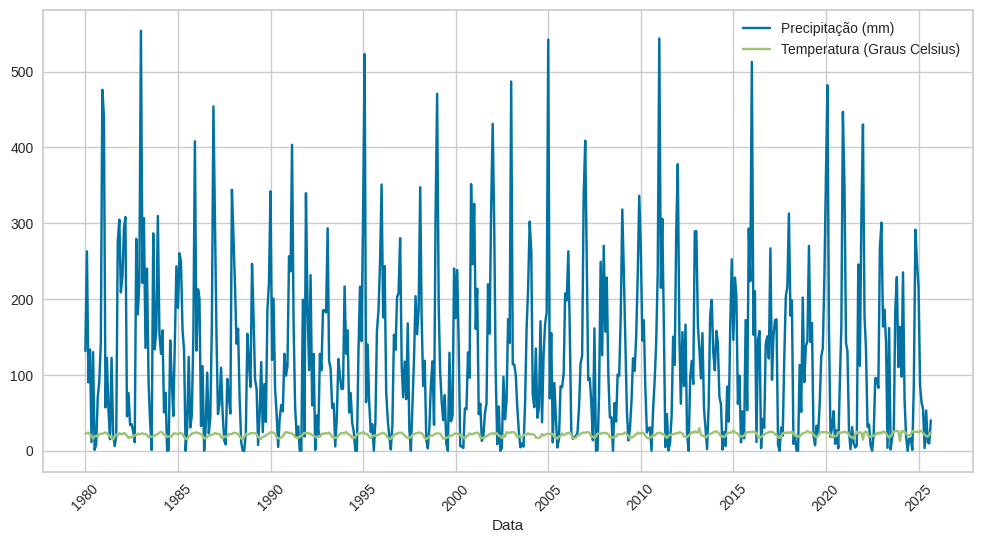

In [13]:
# Cria o gráfico de precipitação mensal
plt.figure(figsize=(12,6))
plt.plot(df.index, df[coluna_precipitacao], label="Precipitação (mm)")
plt.plot(df.index, df[coluna_temperatura_media], label="Temperatura (Graus Celsius)")

# Adiciona título e rótulos
#plt.title("Série Temporal de Precipitação e Temperatura Mensal")
plt.xlabel("Data")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

# Previsão futura

In [14]:
from pycaret.time_series import setup, compare_models, finalize_model, predict_model

# --- Configuração do PyCaret ---
# Inicializando o ambiente com os dados Mensais
# fh=60: Horizon of the forecast (60 meses, equivalente a cinco anos)
print("\nIniciando a Configuração do PyCaret (Dados Mensais)...")
s_mensal = setup(
    data = df,
    target = coluna_precipitacao,
    fh = 60,
    session_id = 456,
    #ignore_prep_pipeline = True,
    #verbose = False
)

# --- Comparação e Seleção do Melhor Modelo (Mensal) ---
print("Comparando Modelos (Mensal)...")
best_model_mensal = compare_models()

print(f"\n--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: {type(best_model_mensal).__name__} ---")

# --- Treinamento e Finalização do Melhor Modelo ---
final_model_mensal = finalize_model(best_model_mensal)

# --- Previsão Futura (Forecast) ---
# Gerando a previsão para 60 meses
predictions_mensal = predict_model(final_model_mensal, X=df[coluna_temperatura_media])

predictions_mensal['y_pred'] = np.clip(predictions_mensal['y_pred'], 0, None)




Iniciando a Configuração do PyCaret (Dados Mensais)...


,Description,Value
0,session_id,456
1,Target,rain
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(549, 2)"
5,Transformed data shape,"(549, 2)"
6,Transformed train set shape,"(489, 2)"
7,Transformed test set shape,"(60, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Comparando Modelos (Mensal)...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6033,0.6229,45.4525,64.5998,4923613071033696.0000,0.5536,0.6264,3.6733
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6144,0.6356,46.2962,65.9028,4229963694093728.0000,0.5672,0.6095,1.8033
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6149,0.6248,46.3302,64.7791,4578991232025504.0000,0.5646,0.6227,2.2767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6164,0.6256,46.4517,64.8645,5270207340106955.0000,0.5593,0.6218,2.4833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6166,0.6257,46.4615,64.8719,5291466839769421.0000,0.5595,0.6217,2.4033
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6166,0.6257,46.4615,64.8719,5291467589407317.0000,0.5595,0.6217,1.7733
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6168,0.6259,46.4823,64.8933,5347253144141964.0000,0.5596,0.6214,2.1067
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6168,0.6259,46.4822,64.8932,5346926500854036.0000,0.5596,0.6214,1.8067
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6176,0.6260,46.5405,64.9065,4599190758046695.0000,0.5654,0.6211,2.0600
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6381,0.6596,48.0913,68.4120,3566782495027050.0000,0.5925,0.5811,3.5400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]


--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: BaseCdsDtForecaster ---


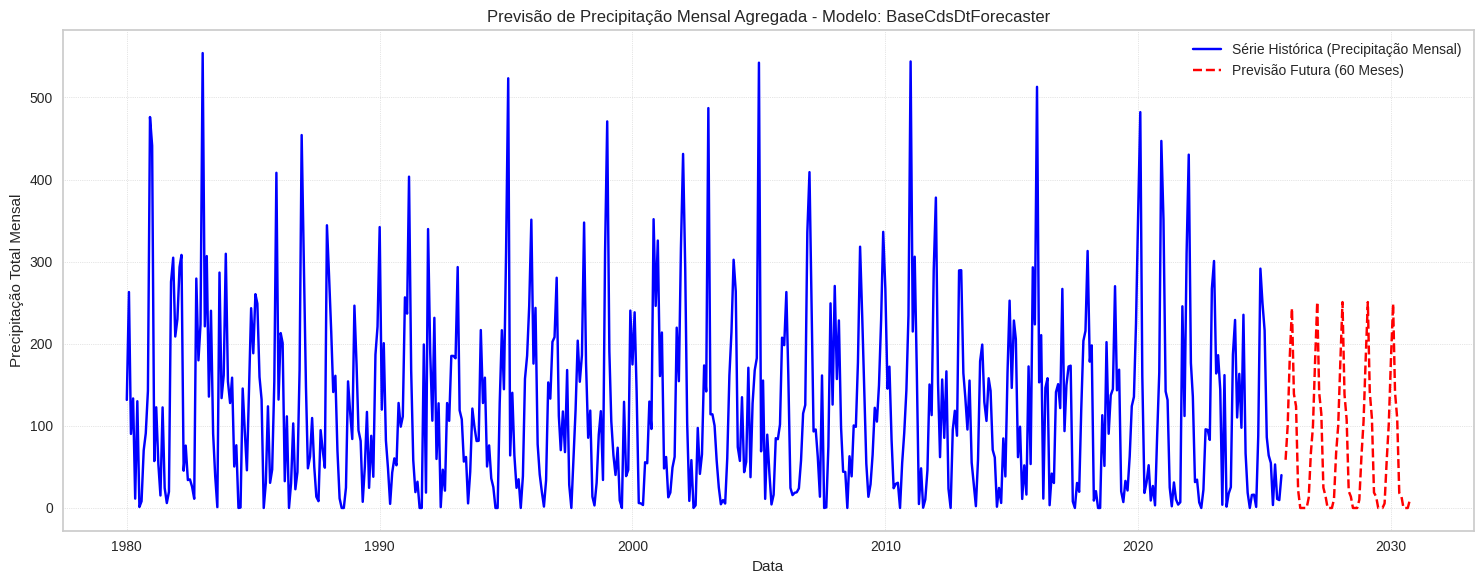

In [15]:
# --- Visualização ---
# Gerando o gráfico de previsão Mensal
plt.figure(figsize=(15, 6))

# Série histórica (Dados Reais Mensais)
plt.plot(df.index, df[coluna_precipitacao], label='Série Histórica (Precipitação Mensal)', color='blue')

# Série histórica (Dados Reais Mensais)
#plt.plot(df_dados_reais_futuro.index, df_dados_reais_futuro[coluna_precipitacao], label='Série Histórica Real do Período Previsto (Precipitação Mensal)', color='green')

# Previsão futura Mensal
plt.plot(predictions_mensal.index, predictions_mensal['y_pred'], label='Previsão Futura (60 Meses)', color='red', linestyle='--')

# Configurações do Gráfico
plt.title(f'Previsão de Precipitação Mensal Agregada - Modelo: {type(best_model_mensal).__name__}')
plt.xlabel('Data')
plt.ylabel('Precipitação Total Mensal')
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# Exibindo os primeiros valores da previsão
#print("\nValores da previsão (60 meses):")
#print(predictions_mensal)